In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/kaggle/input/framingham-heart-study-dataset/framingham.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.shape

(4240, 16)

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


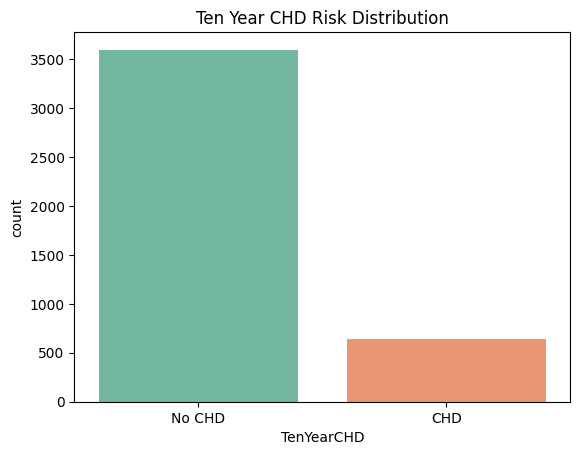

In [6]:

print(df['TenYearCHD'].value_counts())

sns.countplot(x='TenYearCHD', data=df, palette='Set2')
plt.title('Ten Year CHD Risk Distribution')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.show()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


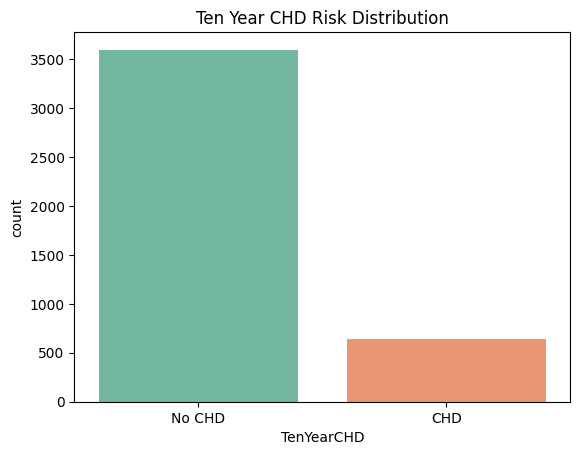

In [7]:

print(df['TenYearCHD'].value_counts())

sns.countplot(x='TenYearCHD', data=df, palette='Set2')
plt.title('Ten Year CHD Risk Distribution')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.show()


Percentage of Males and Females per Age Group:
           Female %  Male %
age_group                  
31-40          55.5    44.5
41-50          56.1    43.9
51-60          58.1    41.9
61-70          59.8    40.2


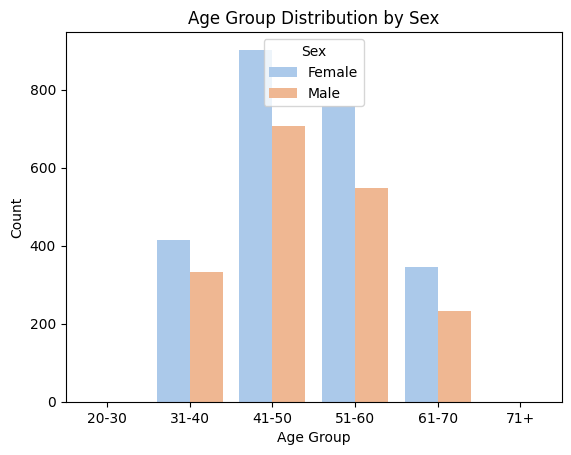

In [8]:

df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 100],
                         labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71+'])

age_sex = pd.crosstab(df['age_group'], df['male'], normalize='index') * 100
age_sex.columns = ['Female %', 'Male %']
print("\nPercentage of Males and Females per Age Group:")
print(age_sex.round(1))

sns.countplot(x='age_group', hue='male', data=df, palette='pastel')
plt.title('Age Group Distribution by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

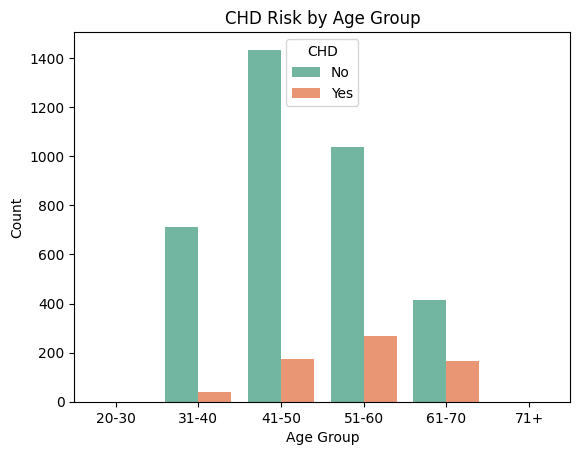

In [9]:
sns.countplot(x='age_group', hue='TenYearCHD', data=df, palette='Set2')
plt.title('CHD Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='CHD', labels=['No', 'Yes'])
plt.show()

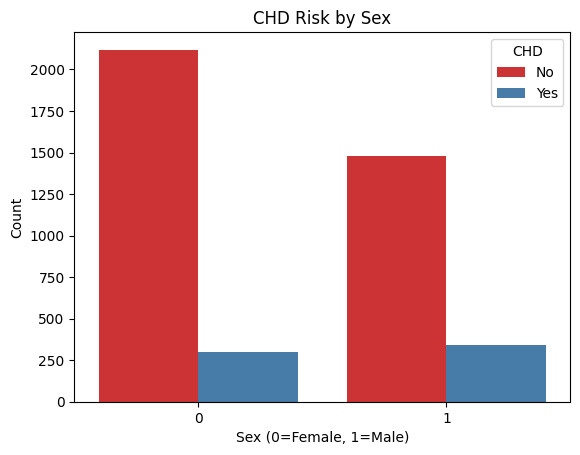

In [10]:
sns.countplot(x='male', hue='TenYearCHD', data=df, palette='Set1')
plt.title('CHD Risk by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(title='CHD', labels=['No', 'Yes'])
plt.show()

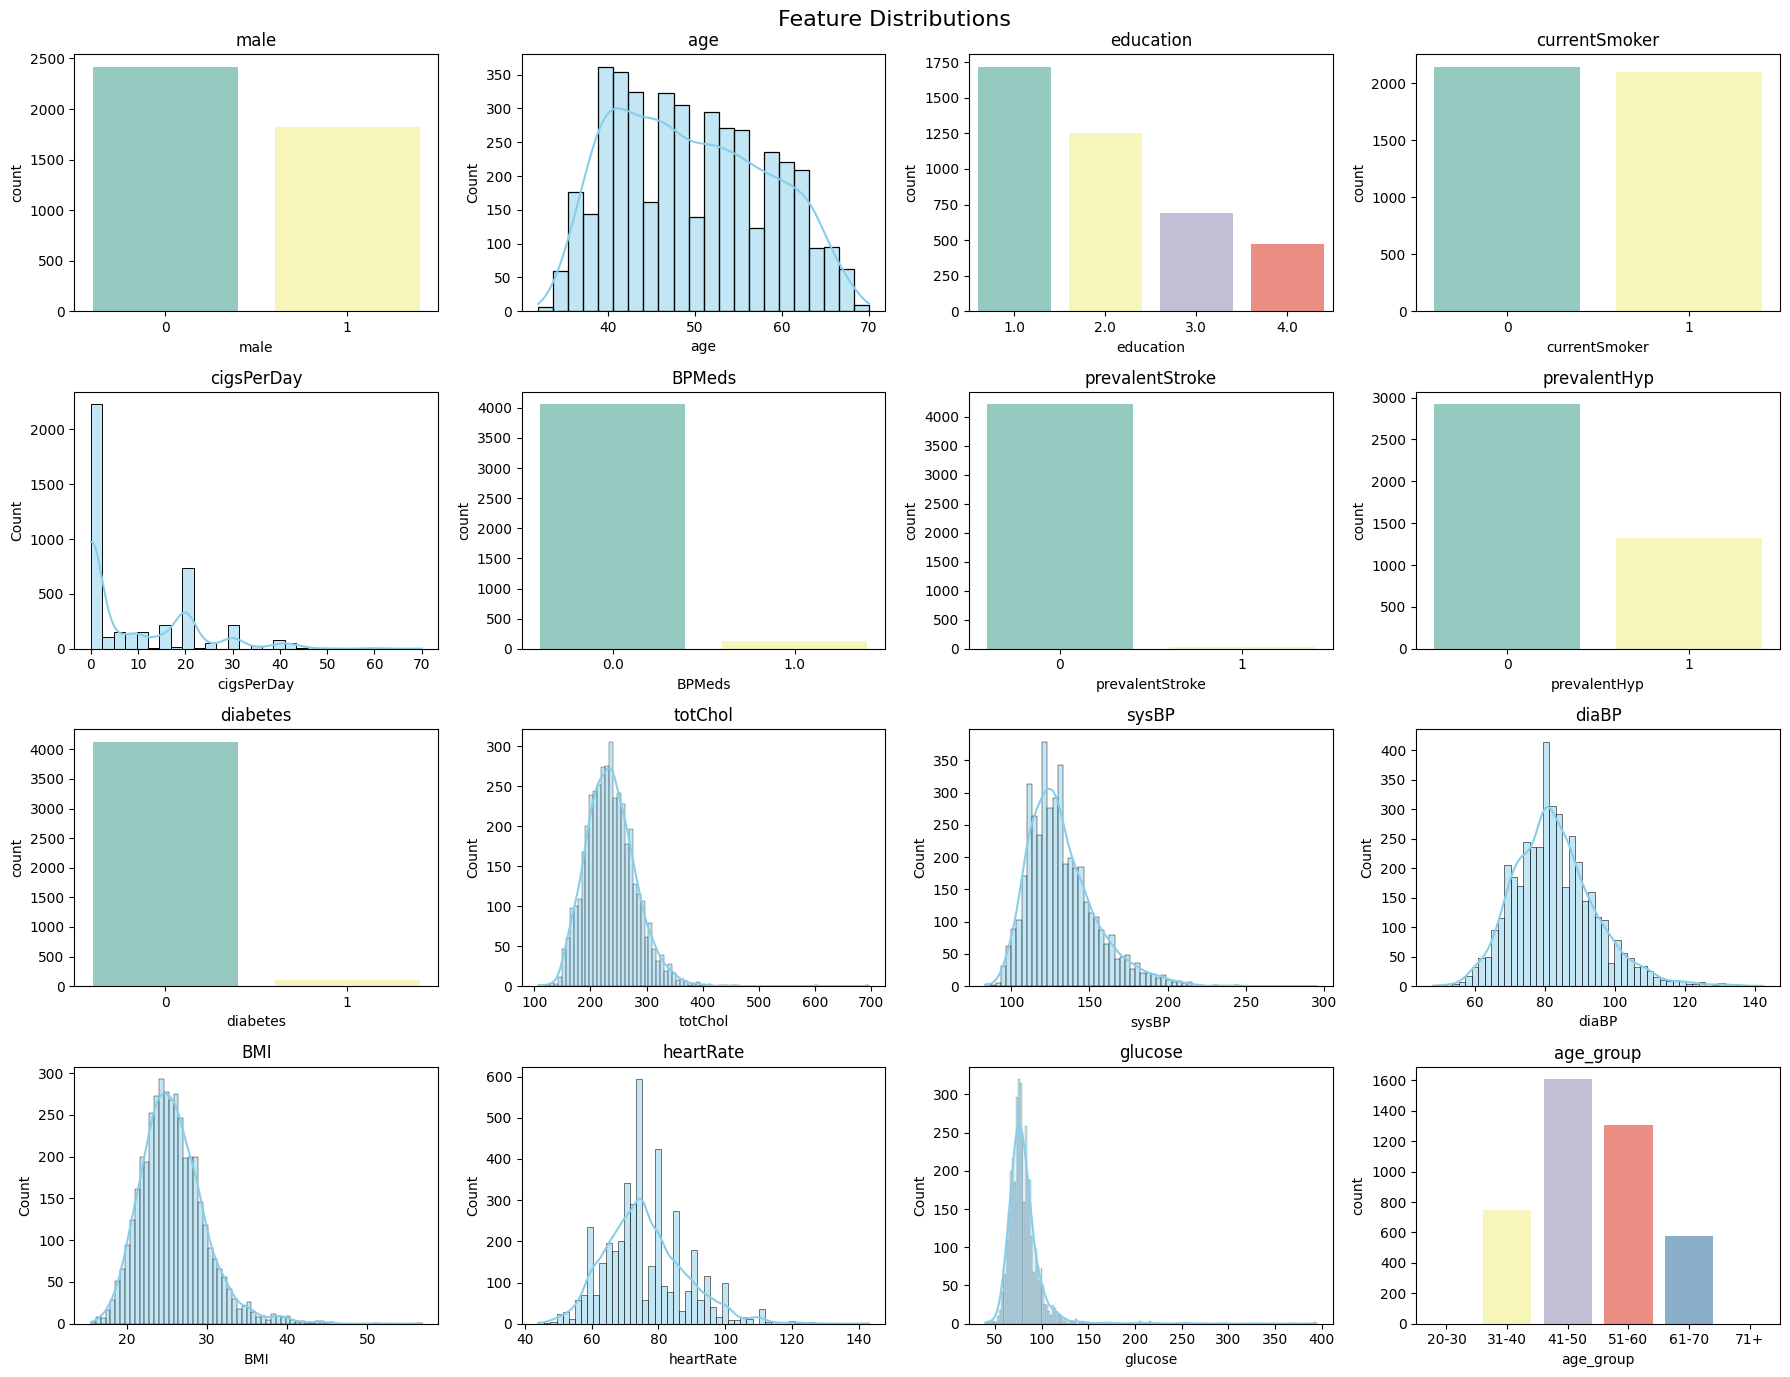

In [11]:

cols = df.columns.drop(['TenYearCHD'])
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
fig.suptitle("Feature Distributions", fontsize=16)

for i, col in enumerate(cols):
    ax = axes[i//4, i%4]
    if df[col].nunique() <= 10:
        sns.countplot(x=col, data=df, ax=ax, palette='Set3')
    else:
        sns.histplot(df[col], kde=True, ax=ax, color='skyblue')
    ax.set_title(col)

plt.tight_layout()
plt.show()

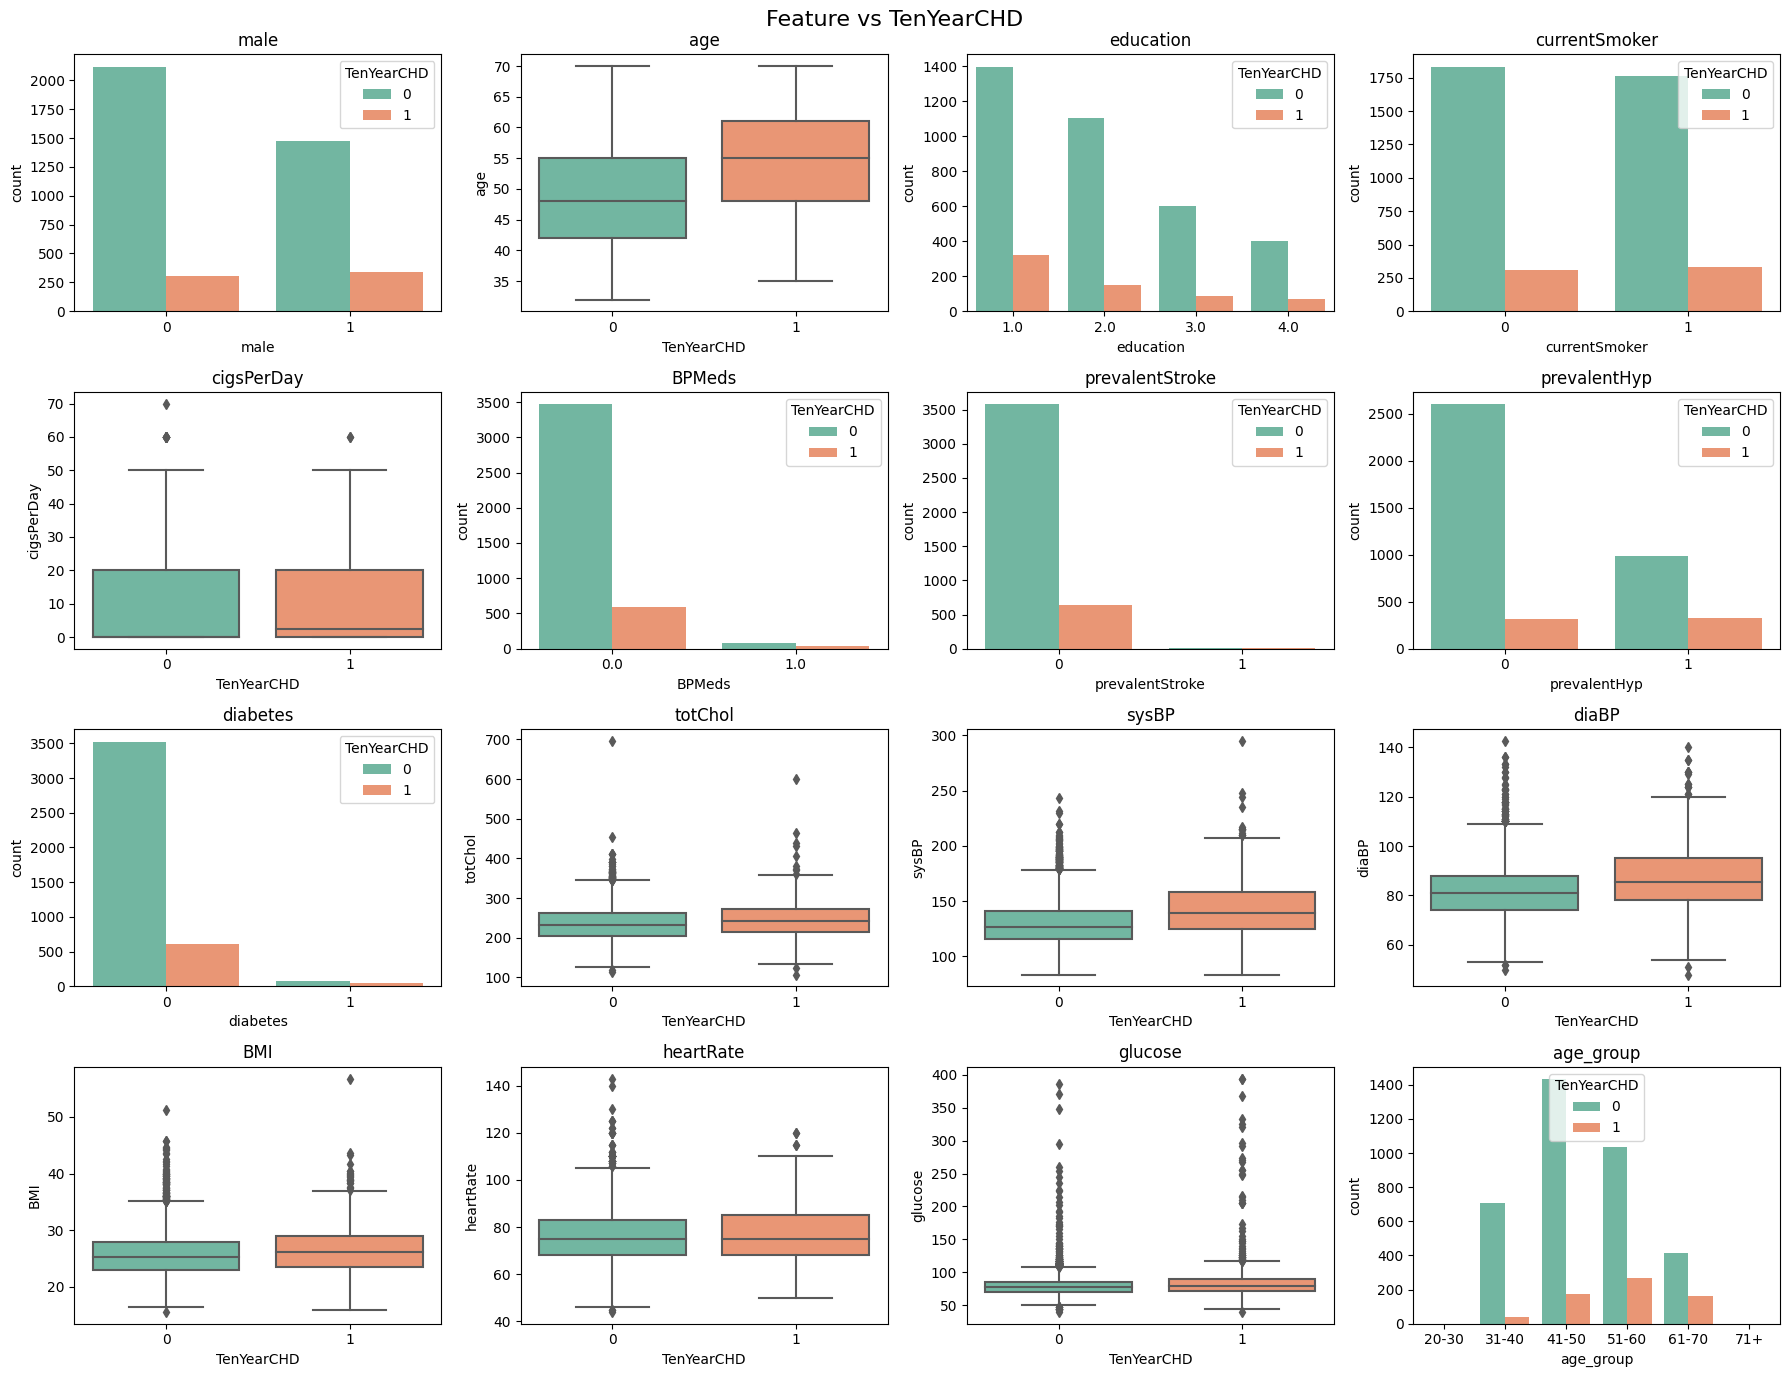

In [12]:

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 14))
fig.suptitle("Feature vs TenYearCHD", fontsize=16)

for i, col in enumerate(cols):
    ax = axes[i//4, i%4]
    if df[col].nunique() <= 10:
        sns.countplot(x=col, hue='TenYearCHD', data=df, ax=ax, palette='Set2')
    else:
        sns.boxplot(x='TenYearCHD', y=col, data=df, ax=ax, palette='Set2')
    ax.set_title(col)

plt.tight_layout()
plt.show()